['qfi_dyn_linearH_T10.npy', 'qfi_dyn_linearH_T100.npy', 'qfi_ana_linearH_T550.npy', 'qfi_ana_expHc_T250.npy', 'qfi_ana_expHc_T10.npy', 'qfi_dyn_expH_T250.npy', 'qfi_ana_linearHc_T5.npy', 'qfi_ana_LA_H_T10.npy', 'qfi_dyn_LA_H_T135.npy', 'qfi_dyn_LA_H_T10.npy', '.DS_Store', 'qfi_ana_linearHc_T1.npy', 'qfi_ana_expH_T100.npy', 'qfi_dyn_linearHc_T10.npy', 'qfi_ana_LA_Hc_T10.npy', 'qfi_dyn_linearH_T5.npy', 'qfi_dyn_expHc_T100.npy', 'qfi_ana_expH_T10.npy', 'qfi_ana_linearHc_T100.npy', 'qfi_dyn_linearHc_T550.npy', 'qfi_dyn_expH_T10.npy', 'qfi_dyn_LA_Hc_T135.npy', 'qfi_dyn_LA_Hc_T50.npy', 'qfi_dyn_linearH_T1.npy', 'qfi_ana_LA_H_T50.npy', 'qfi_ana_linearH_T100.npy', 'qfi_dyn_linearH_T550.npy', 'qfi_dyn_expHc_T250.npy', 'qfi_ana_LA_Hc_T50.npy', 'qfi_ana_linearHc_T10.npy', 'qfi_dyn_LA_H_T50.npy', 'qfi_ana_expH_T250.npy', 'qfi_dyn_expHc_T10.npy', 'qfi_dyn_linearHc_T5.npy', 'qfi_ana_LA_H_T135.npy', 'qfi_ana_linearHc_T550.npy', 'qfi_ana_linearH_T1.npy', 'qfi_ana_LA_Hc_T135.npy', 'qfi_ana_linearH_T10.

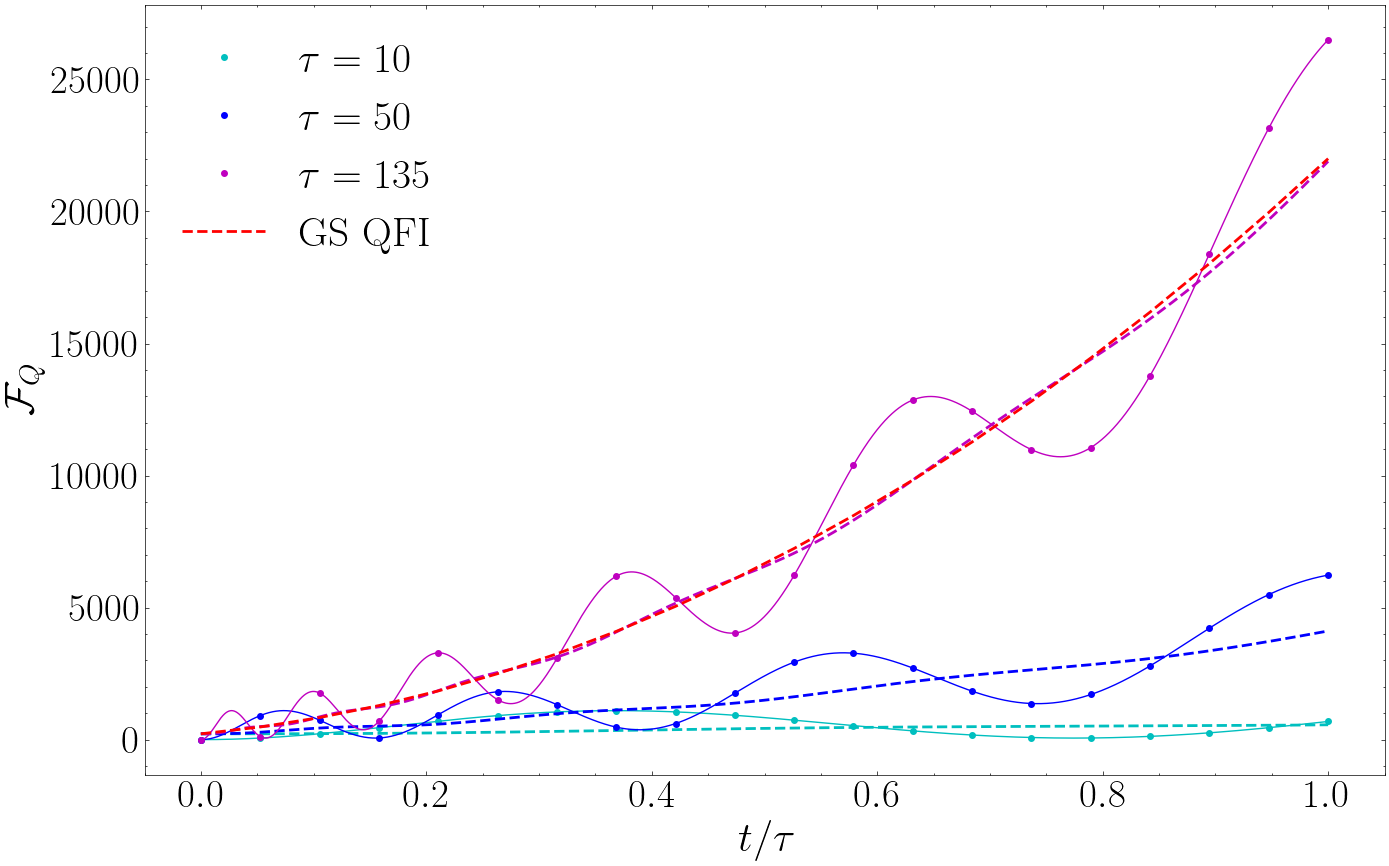

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
import os
plt.style.use(["science"])
plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = "serif"
plt.rcParams.update({
    "axes.labelsize": 30,    # x- and y-label size
    "axes.titlesize": 28,    # title size
    "xtick.labelsize": 28,   # x-tick label size
    "ytick.labelsize": 28,   # y-tick label size
    "legend.fontsize": 30,   # legend text size
})

N = 20
g0 = 1
g1 = 0.1
a = -1/(np.log(g1/g0))
gamma = 15

def g_func(t, T):
    #return g0 + (g1 - g0) * (t / T)
    #return g0 * np.exp(-t / (a*T))
    return 1/(1/g0 + t/gamma)

def qfi_GS(N, t, T):
    return N*(0.5*N+1) / g_func(t, T)**2

data_dir = 'qfi_data'
print(os.listdir('qfi_data'))

#T_values = [10,100,550]
#T_values = [10,100,250]
T_values = [10,50,135]
colors = ['c', 'b', 'm']
tau_values = np.linspace(0, 1, 20) 
tau_values_ana = np.linspace(0, 1, 20000) 
plt.figure(figsize=(16, 10))

for i, T_val in enumerate(T_values):
    single_T = T_val
    single_path_dyn_Hc = os.path.join(data_dir, f'qfi_dyn_LA_Hc_T{single_T}.npy')
    single_path_ana_Hc = os.path.join(data_dir, f'qfi_ana_LA_Hc_T{single_T}.npy')
    qfi_array_dyn_Hc = np.load(single_path_dyn_Hc)
    qfi_array_ana_Hc = np.load(single_path_ana_Hc)
    plt.plot(tau_values, qfi_array_dyn_Hc, color=colors[i], marker='.', markersize=8, linestyle = 'None', label=f'$ \\tau = {single_T}$')
    plt.plot(tau_values_ana, qfi_array_ana_Hc, color=colors[i])
    single_path_ana_H = os.path.join(data_dir, f'qfi_ana_LA_H_T{single_T}.npy')
    qfi_array_ana_H = np.load(single_path_ana_H)
    plt.plot(tau_values_ana, qfi_array_ana_H, color=colors[i], linestyle='--', linewidth=2)

T_GS = 135
qfi_GS_vals = []
for tau in tau_values:
    t = tau * T_GS
    qfi_GS_vals.append(qfi_GS(N, t, T_GS))
plt.plot(tau_values, qfi_GS_vals, 'r--', linewidth=2, label="GS QFI")

plt.xlabel(r'$t/\tau$')
plt.ylabel(r'$\mathcal{F}_Q$')
#plt.yscale('log')
plt.legend(loc='best')
#plt.ylim(5e-2,1e5)
#plt.savefig("qfilinearfinalplot.pdf", format="pdf", bbox_inches="tight")
plt.show()

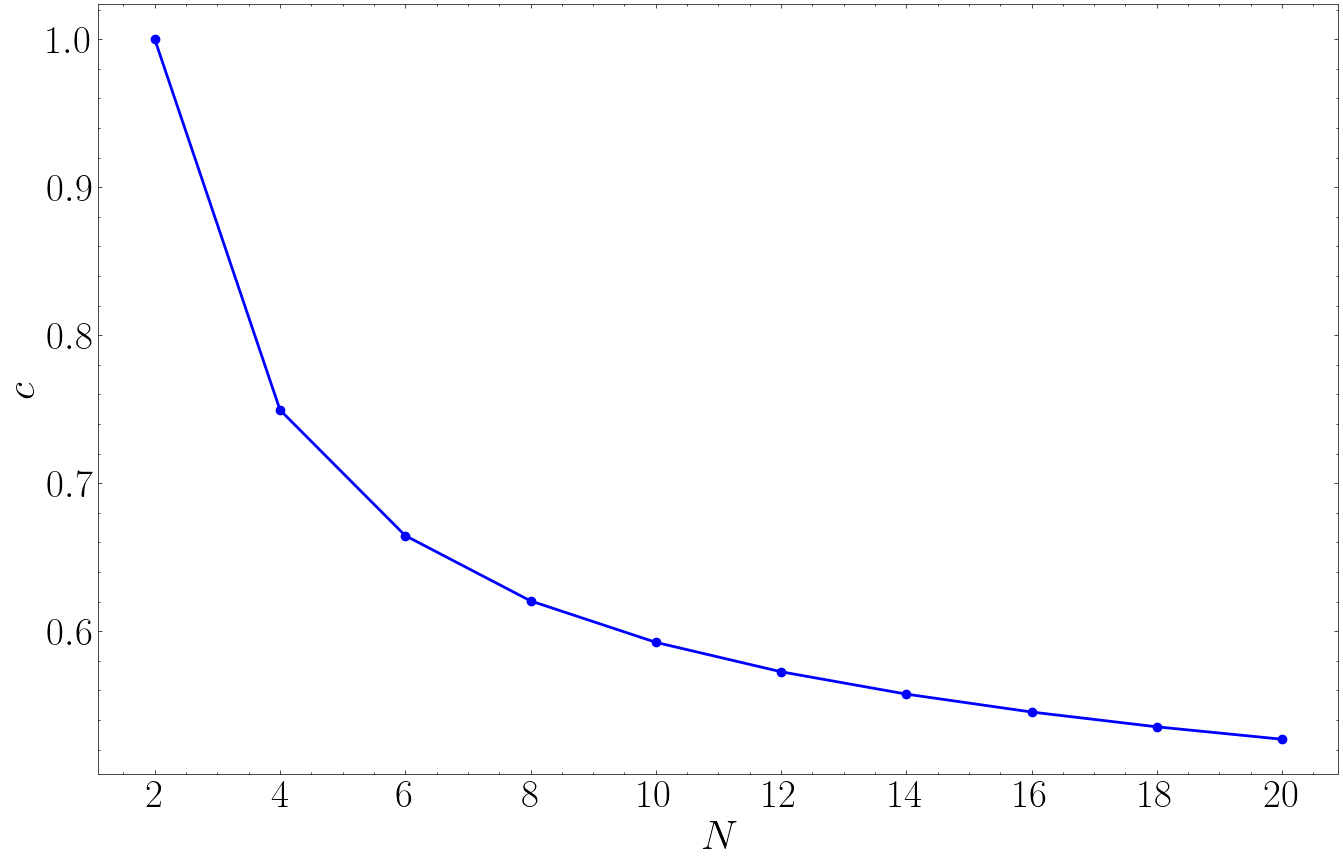

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
import os
plt.style.use(["science"])
plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = "serif"
plt.rcParams.update({
    "axes.labelsize": 30,    # x- and y-label size
    "axes.titlesize": 28,    # title size
    "xtick.labelsize": 28,   # x-tick label size
    "ytick.labelsize": 28,   # y-tick label size
    "legend.fontsize": 30,   # legend text size
})

L_list = [2,4,6,8,10,12,14,16,18,20]
prefactors = [1.0000,0.7495,0.6646,0.6205,0.5925,0.5726,0.5575,0.5454,0.5354,0.5270]

plt.figure(figsize=(16, 10))
plt.plot(L_list, prefactors, 'o-', color='b', markersize=6, linewidth=2)
plt.xlabel(r'$N$')
plt.ylabel(r'$c$')
plt.xticks(L_list)
plt.savefig("prefactor_vs_L.pdf", format="pdf", bbox_inches="tight")
plt.show()

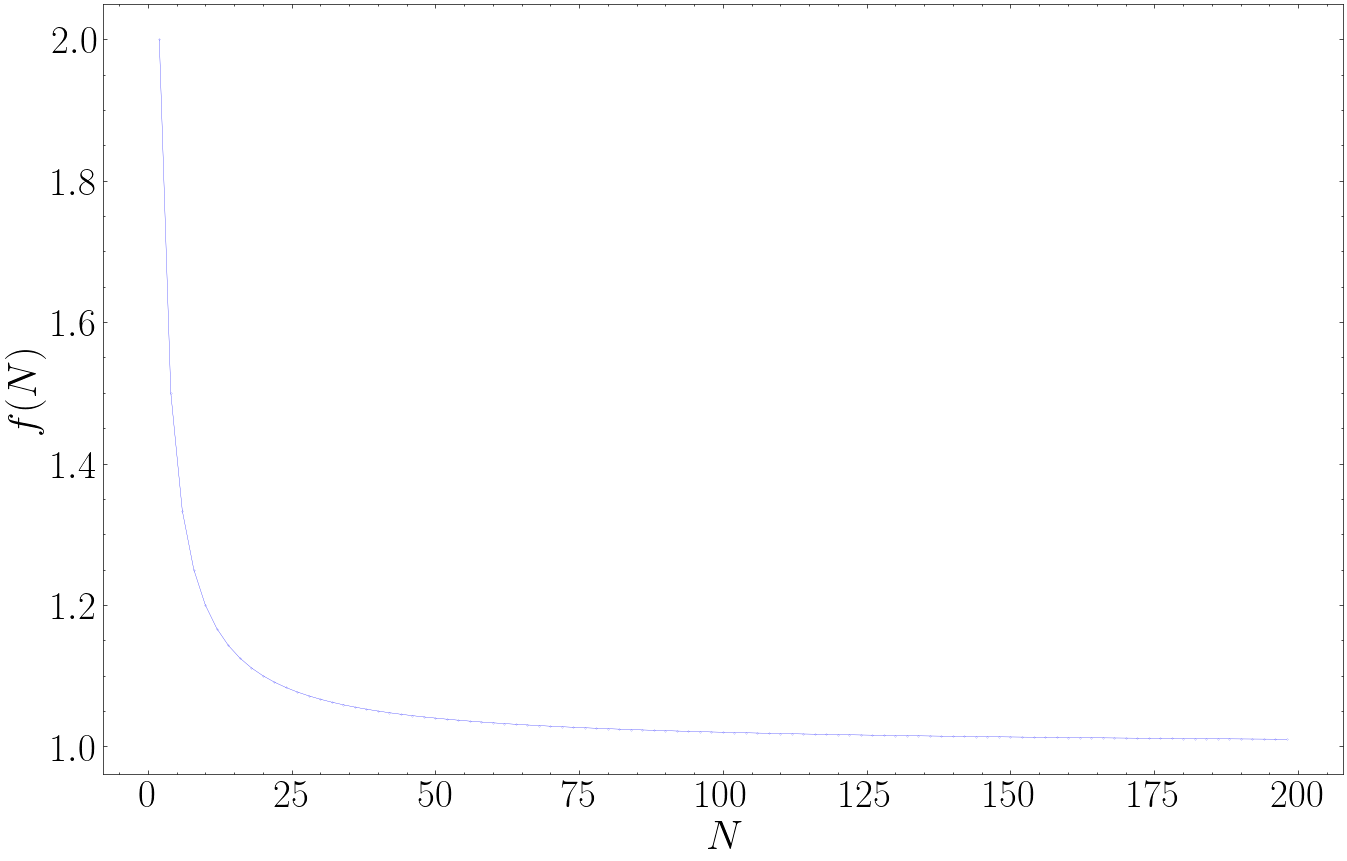

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
import os
plt.style.use(["science"])
plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = "serif"
plt.rcParams.update({
    "axes.labelsize": 30,    # x- and y-label size
    "axes.titlesize": 28,    # title size
    "xtick.labelsize": 28,   # x-tick label size
    "ytick.labelsize": 28,   # y-tick label size
    "legend.fontsize": 30,   # legend text size
})

def f(N):
    return N*(0.5*N+1)

N_values = 2*np.arange(1,100)
f_values = f(N_values)
ratio_values = f_values / (0.5 * N_values**2)
plt.figure(figsize=(16, 10))
plt.plot(N_values, ratio_values, 'o-', color='b', markersize=.1, linewidth=.2)
#plt.plot(N_values, 0.5*N_values**2, color='red')
plt.xlabel(r'$N$')
plt.ylabel(r'$f(N)$')
plt.show()

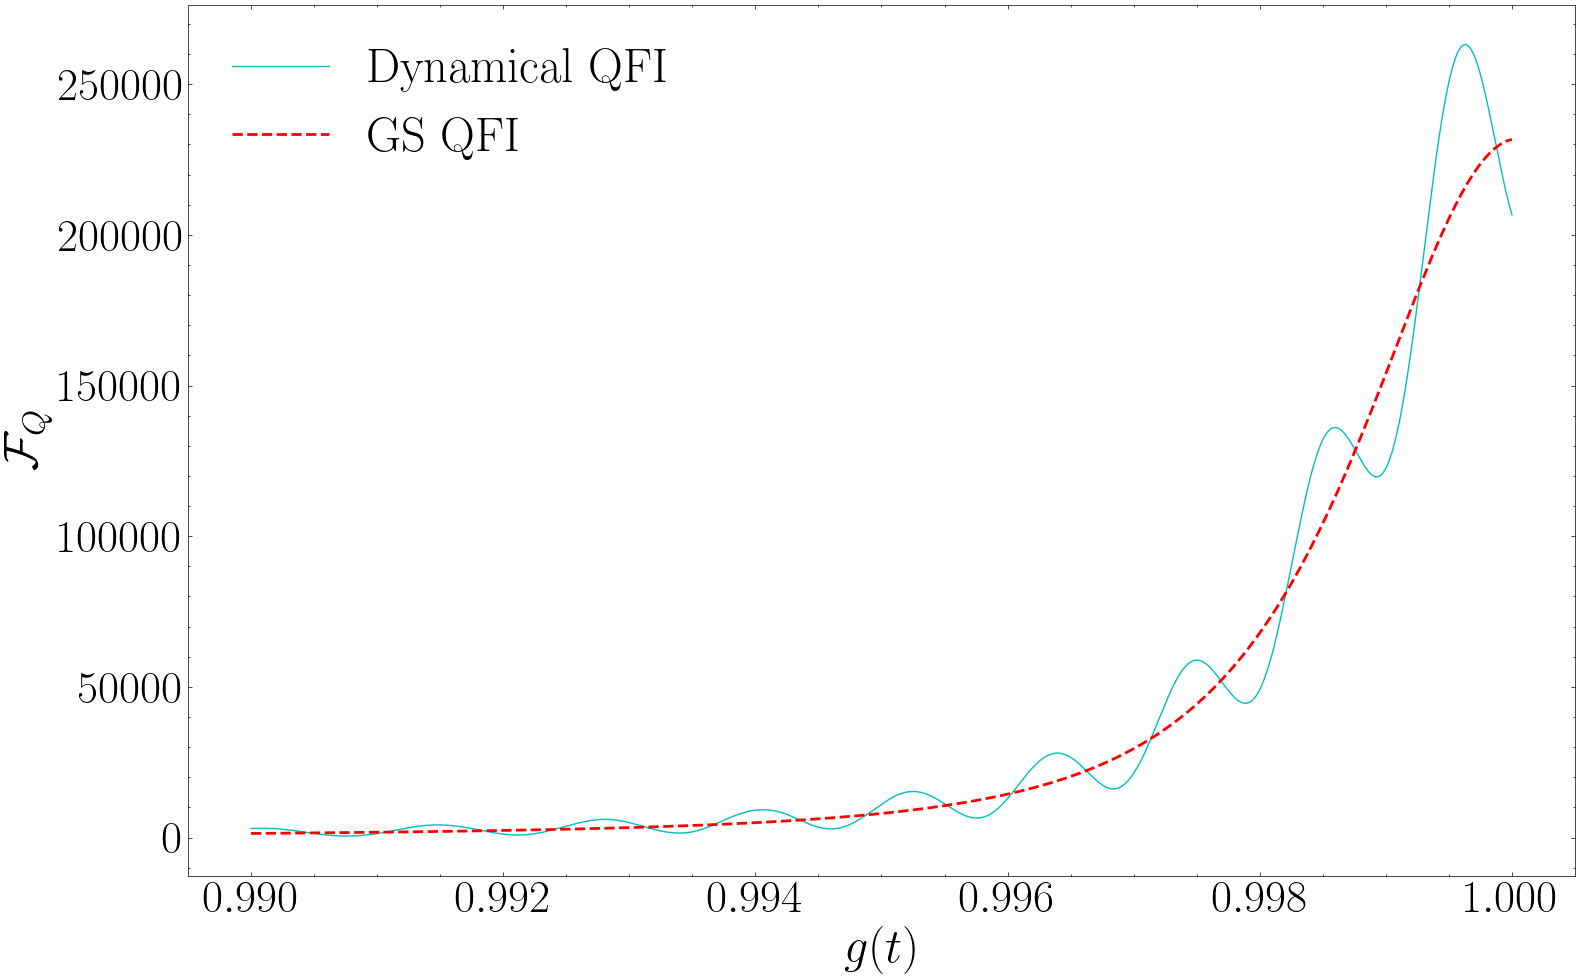

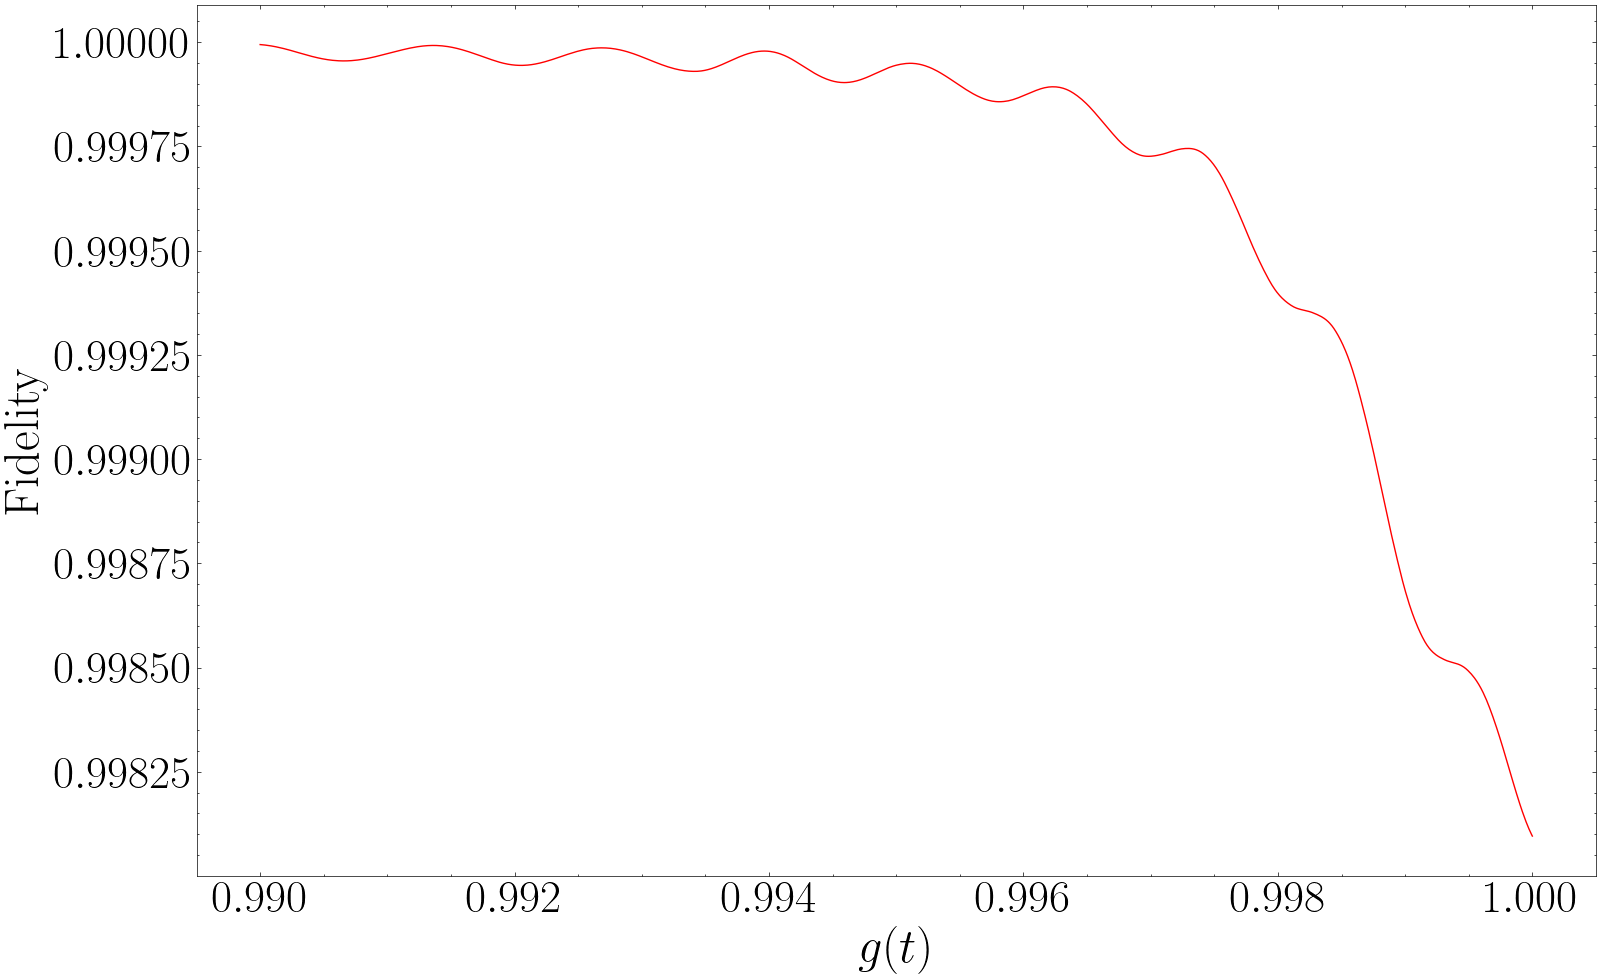

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
import os
plt.style.use(["science"])
plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = "serif"
plt.rcParams.update({
    "axes.labelsize": 35,    # x- and y-label size
    "axes.titlesize": 33,    # title size
    "xtick.labelsize": 33,   # x-tick label size
    "ytick.labelsize": 33,   # y-tick label size
    "legend.fontsize": 35,   # legend text size
})

data = np.loadtxt('QFI_table_data.txt', skiprows=1)

# Extract columns: column 0 is s(t), column 2 is QFI_evo
s_t = data[:, 0]
QFI_evo = data[:, 2]
QFI_gs = data[:, 4]
fid = data[:, 5]

mask = s_t > 0.99

# Apply it
s_sel     = s_t[mask]
QFI_sel   = QFI_evo[mask]
QFI_gs_sel = QFI_gs[mask]
fid_sel   = fid[mask]


# Create the plot
plt.figure(figsize=(16, 10))
plt.plot(s_sel, QFI_sel, color='c', label='Dynamical QFI')
plt.plot(s_sel, QFI_gs_sel, 'r--', linewidth=2, label='GS QFI')
plt.xlabel(r'$g(t)$')
plt.ylabel(r'$\mathcal{F}_Q$')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig("QFI_vs_s_XXZ.pdf", format="pdf", bbox_inches="tight")
plt.show()

plt.figure(figsize=(16, 10))
plt.plot(s_sel, fid_sel, color='red')
plt.xlabel(r'$g(t)$')
plt.ylabel('Fidelity')
plt.tight_layout()
plt.savefig("fid_vs_s_XXZ.pdf", format="pdf", bbox_inches="tight")
plt.show()